In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
wine = pd.read_csv("dataset//Wine quality.csv")
wine["color"] = wine["wine"] == "red"
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,wine,color
0,6.2,0.28,0.33,1.7,0.029,24.0,111.0,0.99000,3.24,0.50,12.1,6,white,False
1,6.2,0.33,0.19,5.6,0.042,22.0,143.0,0.99425,3.15,0.63,9.9,5,white,False
2,7.0,0.32,0.24,6.2,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,white,False
3,10.4,0.64,0.24,2.8,0.105,29.0,53.0,0.99980,3.24,0.67,9.9,5,red,True
4,6.2,0.28,0.27,10.3,0.030,26.0,108.0,0.99388,3.20,0.36,10.7,6,white,False


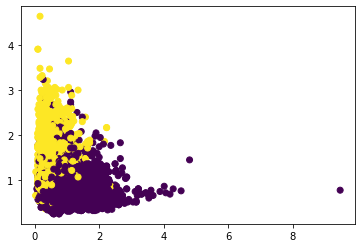

In [3]:
# Standardization
wine["free.sulfur.dioxide"] = wine["free.sulfur.dioxide"] / wine["free.sulfur.dioxide"].mean()
wine["volatile.acidity"] = wine["volatile.acidity"] / wine["volatile.acidity"].mean()

plt.scatter(x="free.sulfur.dioxide", y="volatile.acidity", data=wine, c="color")
plt.show()

In [4]:
w = [0, 0]
for t in range(10000):
    if t % 100 == 0:
        print(f"{int(t/100)}/100, w: {w}")
    for row in range(wine.shape[0]):
        if (w[0]*wine["free.sulfur.dioxide"][row] + 
            w[1]*wine["volatile.acidity"][row] > 0 and wine["color"][row]) or\
            (w[0]*wine["free.sulfur.dioxide"][row] + 
             w[1]*wine["volatile.acidity"][row] <= 0 and ~wine["color"][row]):
            continue
        elif wine["color"][row]:
            w = [w[0] + wine["free.sulfur.dioxide"][row], 
                 w[1] + wine["volatile.acidity"][row]]
        else:
            w = [w[0] - wine["free.sulfur.dioxide"][row], 
                 w[1] - wine["volatile.acidity"][row]]

0/100, w: [0, 0]
1/100, w: [-4.32427908008687, 2.546619328351114]
2/100, w: [-4.291519390086571, 2.546619328350455]
3/100, w: [-2.9319922550597206, 1.3689918932738299]
4/100, w: [-4.373418615088921, 2.5613396712875955]
5/100, w: [-4.324279080088291, 2.546619328348494]
6/100, w: [-4.291519390087992, 2.546619328347835]
7/100, w: [-2.9319922550611417, 1.3689918932712097]
8/100, w: [-4.373418615090342, 2.5613396712849754]
9/100, w: [-4.324279080089712, 2.546619328345874]
10/100, w: [-4.291519390089413, 2.5466193283452148]
11/100, w: [-2.931992255062563, 1.3689918932685896]
12/100, w: [-4.373418615091763, 2.5613396712823553]
13/100, w: [-4.3242790800911335, 2.5466193283432537]
14/100, w: [-4.291519390090834, 2.5466193283425946]
15/100, w: [-2.931992255063984, 1.3689918932659695]
16/100, w: [-4.373418615093184, 2.561339671279735]
17/100, w: [-4.324279080092555, 2.5466193283406335]
18/100, w: [-4.2915193900922555, 2.5466193283399745]
19/100, w: [-2.931992255065405, 1.3689918932633494]
20/100,

In [5]:
count = 0
for row in range(wine.shape[0]):
    if (w[0]*wine["free.sulfur.dioxide"][row] + 
        w[1]*wine["volatile.acidity"][row] > 0 and wine["color"][row]) or\
        (w[0]*wine["free.sulfur.dioxide"][row] + 
         w[1]*wine["volatile.acidity"][row] <= 0 and ~wine["color"][row]):
        count += 1
    else:
        continue
print(count / wine.shape[0])

0.8653224565183931


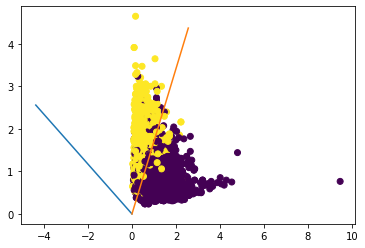

In [6]:
plt.scatter(x="free.sulfur.dioxide", y="volatile.acidity", data=wine, c="color")
plt.plot([0, w[0]], [0, w[1]])  # (0, 0) 到 (w[0], w[1]) 的直线。
plt.plot([0, w[1]], [0, -w[0]])  # (0, 0) 到 (w[1], -w[0]) 的直线。
plt.show()

 **解释：为什么是 $(0, 0)$ 到 $(w[1], -w[0])$ (即：$(0, 0)$ 到 $(1, -\frac{w\mbox{[0]}}{w\mbox{[1]}})$）的直线，而不是 $(0, 0)$ 到 $(1, \frac{w\mbox{[1]}}{w\mbox{[0]}})$ 的直线（即直接是斜率）？**
 
 
首先我们注意到，对于两个斜率 $-\frac{w\mbox{[0]}}{w\mbox{[1]}}$ 和 $\frac{w\mbox{[1]}}{w\mbox{[0]}}$ 互为负倒数，可知它们的直线相互垂直。又因为两个向量点积等于 $0$，意味着这两个向量正交（垂直）。

我们最终求出来的权重向量是 $\vec{w} = (w\mbox{[0]}, w\mbox{[1]}) = (1, \frac{w\mbox{[1]}}{w\mbox{[0]}})$，在算法中我们通过点积 $\vec{w}\cdot\vec{x}$ 的符号与 label $y$ 的关系作为更新决策的条件“，即 $\vec{w}\cdot\vec{x}$ 与 $0$ 的大小关系。再换句话说，在理想情况（即两类数据被完美线性分割）下，假设最终求出的权重的估计值为 $\vec{w}^{*}$，那么对于数据中的一类有： $\vec{w}^{*} \cdot \vec{x}^{(1)} >  0$，另一类有：$\vec{w}^{*} \cdot \vec{x}^{(2)} < 0$。

那么，假设斜率为 $k$ 的直线（向量形式记作 $\vec{k}$）对两类数据 $(x^{(1)}, y^{(1)})$ 和 $(x^{(2)}, y^{(2)})$ 进行分割，那么它一定与 $\vec{w}^{*}$ 正交（垂直），因为它们的点积为 $0$，而点积为 $0$ 的原因是，两类数据（$y = -1$ 和 $y = 1$）被分类： $-1 < \vec{w}^{*} \cdot \vec{k} < 1$。得到结论：

$\vec{w}^{*}$ 始终与将两类数据分割的超平面正交（垂直）。
